1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: xlabel='features_1', ylabel='features_1'>,
        <Axes: xlabel='features_2', ylabel='features_1'>,
        <Axes: xlabel='features_3', ylabel='features_1'>],
       [<Axes: xlabel='features_1', ylabel='features_2'>,
        <Axes: xlabel='features_2', ylabel='features_2'>,
        <Axes: xlabel='features_3', ylabel='features_2'>],
       [<Axes: xlabel='features_1', ylabel='features_3'>,
        <Axes: xlabel='features_2', ylabel='features_3'>,
        <Axes: xlabel='features_3', ylabel='features_3'>]], dtype=object)

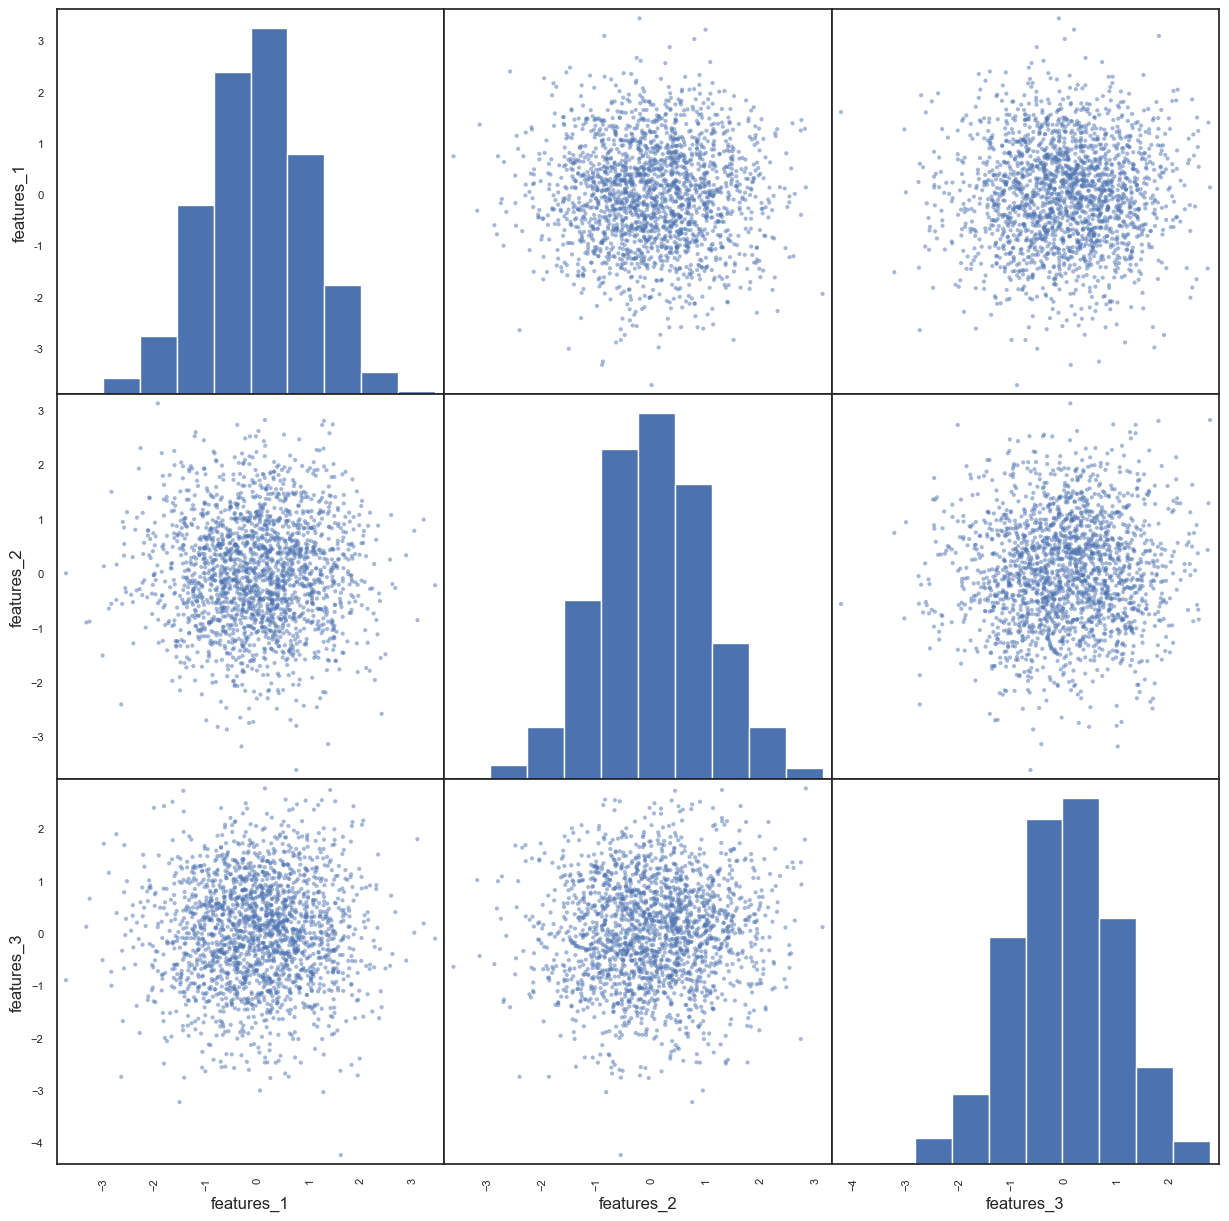

In [101]:
df = pd.read_csv("./data/regression_generated.csv")
pd.plotting.scatter_matrix(df[['features_1','features_2', 'features_3']], figsize = (15,15))

In [102]:
corr_df = df[['features_1','features_2', 'features_3']].corr()
corr_df

,features_1,features_2,features_3
features_1,1.00000,-0.00522,0.02369
features_2,-0.00522,1.00000,0.04736
features_3,0.02369,0.04736,1.00000


* The 3 features are not correlated, becaure as we can see in the scatter plots, they don't have a linear relationship with each other.

* Also, As you can see in the matrix above, the correlation between feature 1 and 2 is 0.0052, correlation between feature 1 and 3 is 0.023 and correlation between feature 3 and 2 is 0.047,  all this values further prove that the correlation between all the features is very low.


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

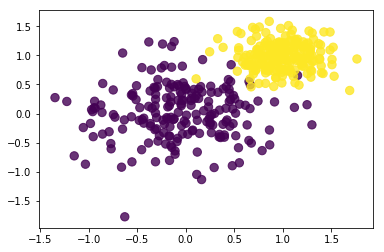

In [103]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

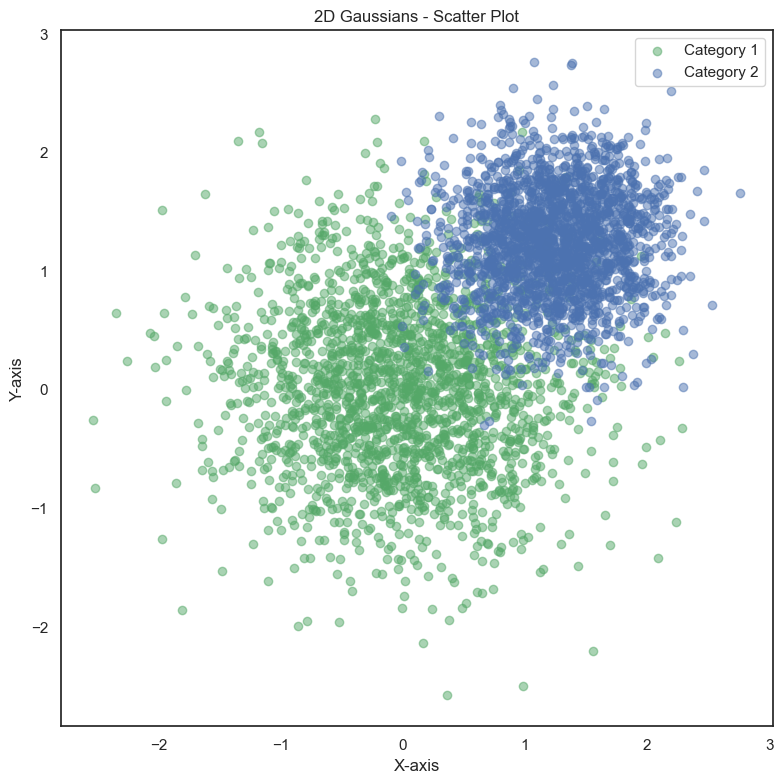

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def dataset_generation(mean_1, cov_1, mean_2, cov_2, n_samples): 
    df_1 = pd.DataFrame(np.random.multivariate_normal(mean_1, cov_1, (n_samples,)), columns=['X', 'Y'])
    df_2 = pd.DataFrame(np.random.multivariate_normal(mean_2, cov_2, (n_samples,)), columns=['X', 'Y'])
    return pd.concat([df_1, df_2], keys=['Category 1', 'Category 2'])

n_samples = 2000
mean_1 = [0, 0]
cov_1 = [[0.5, 0], [0, 0.5]]
mean_2 = [1.25, 1.25]
cov_2 = [[0.2, 0], [0, 0.2]]

dataset = dataset_generation(mean_1, cov_1, mean_2, cov_2, n_samples)

plt.figure(figsize=(8, 8))
plt.scatter(x=dataset.loc['Category 1', 'X'], y=dataset.loc['Category 1', 'Y'], marker='o', c='g', edgecolor='g', label='Category 1', alpha=0.5)
plt.scatter(x=dataset.loc['Category 2', 'X'], y=dataset.loc['Category 2', 'Y'], marker='o', c='b', edgecolor='b', label='Category 2', alpha=0.5)
plt.legend()
plt.title('2D Gaussians - Scatter Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.tight_layout()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [105]:
pickle_file = np.load("./data/residuals_261.pkl", allow_pickle=True,).item()

In [106]:
df = pd.DataFrame(pickle_file)

In [107]:
df.head()

,residuals,distances
0,1.10,16.0
1,-1.95,6.3
2,-7.20,3.4
3,-4.15,8.4
4,-6.59,1.7


In [108]:
df = df[abs(df['residuals'])<2]

In [109]:
df.head()

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0


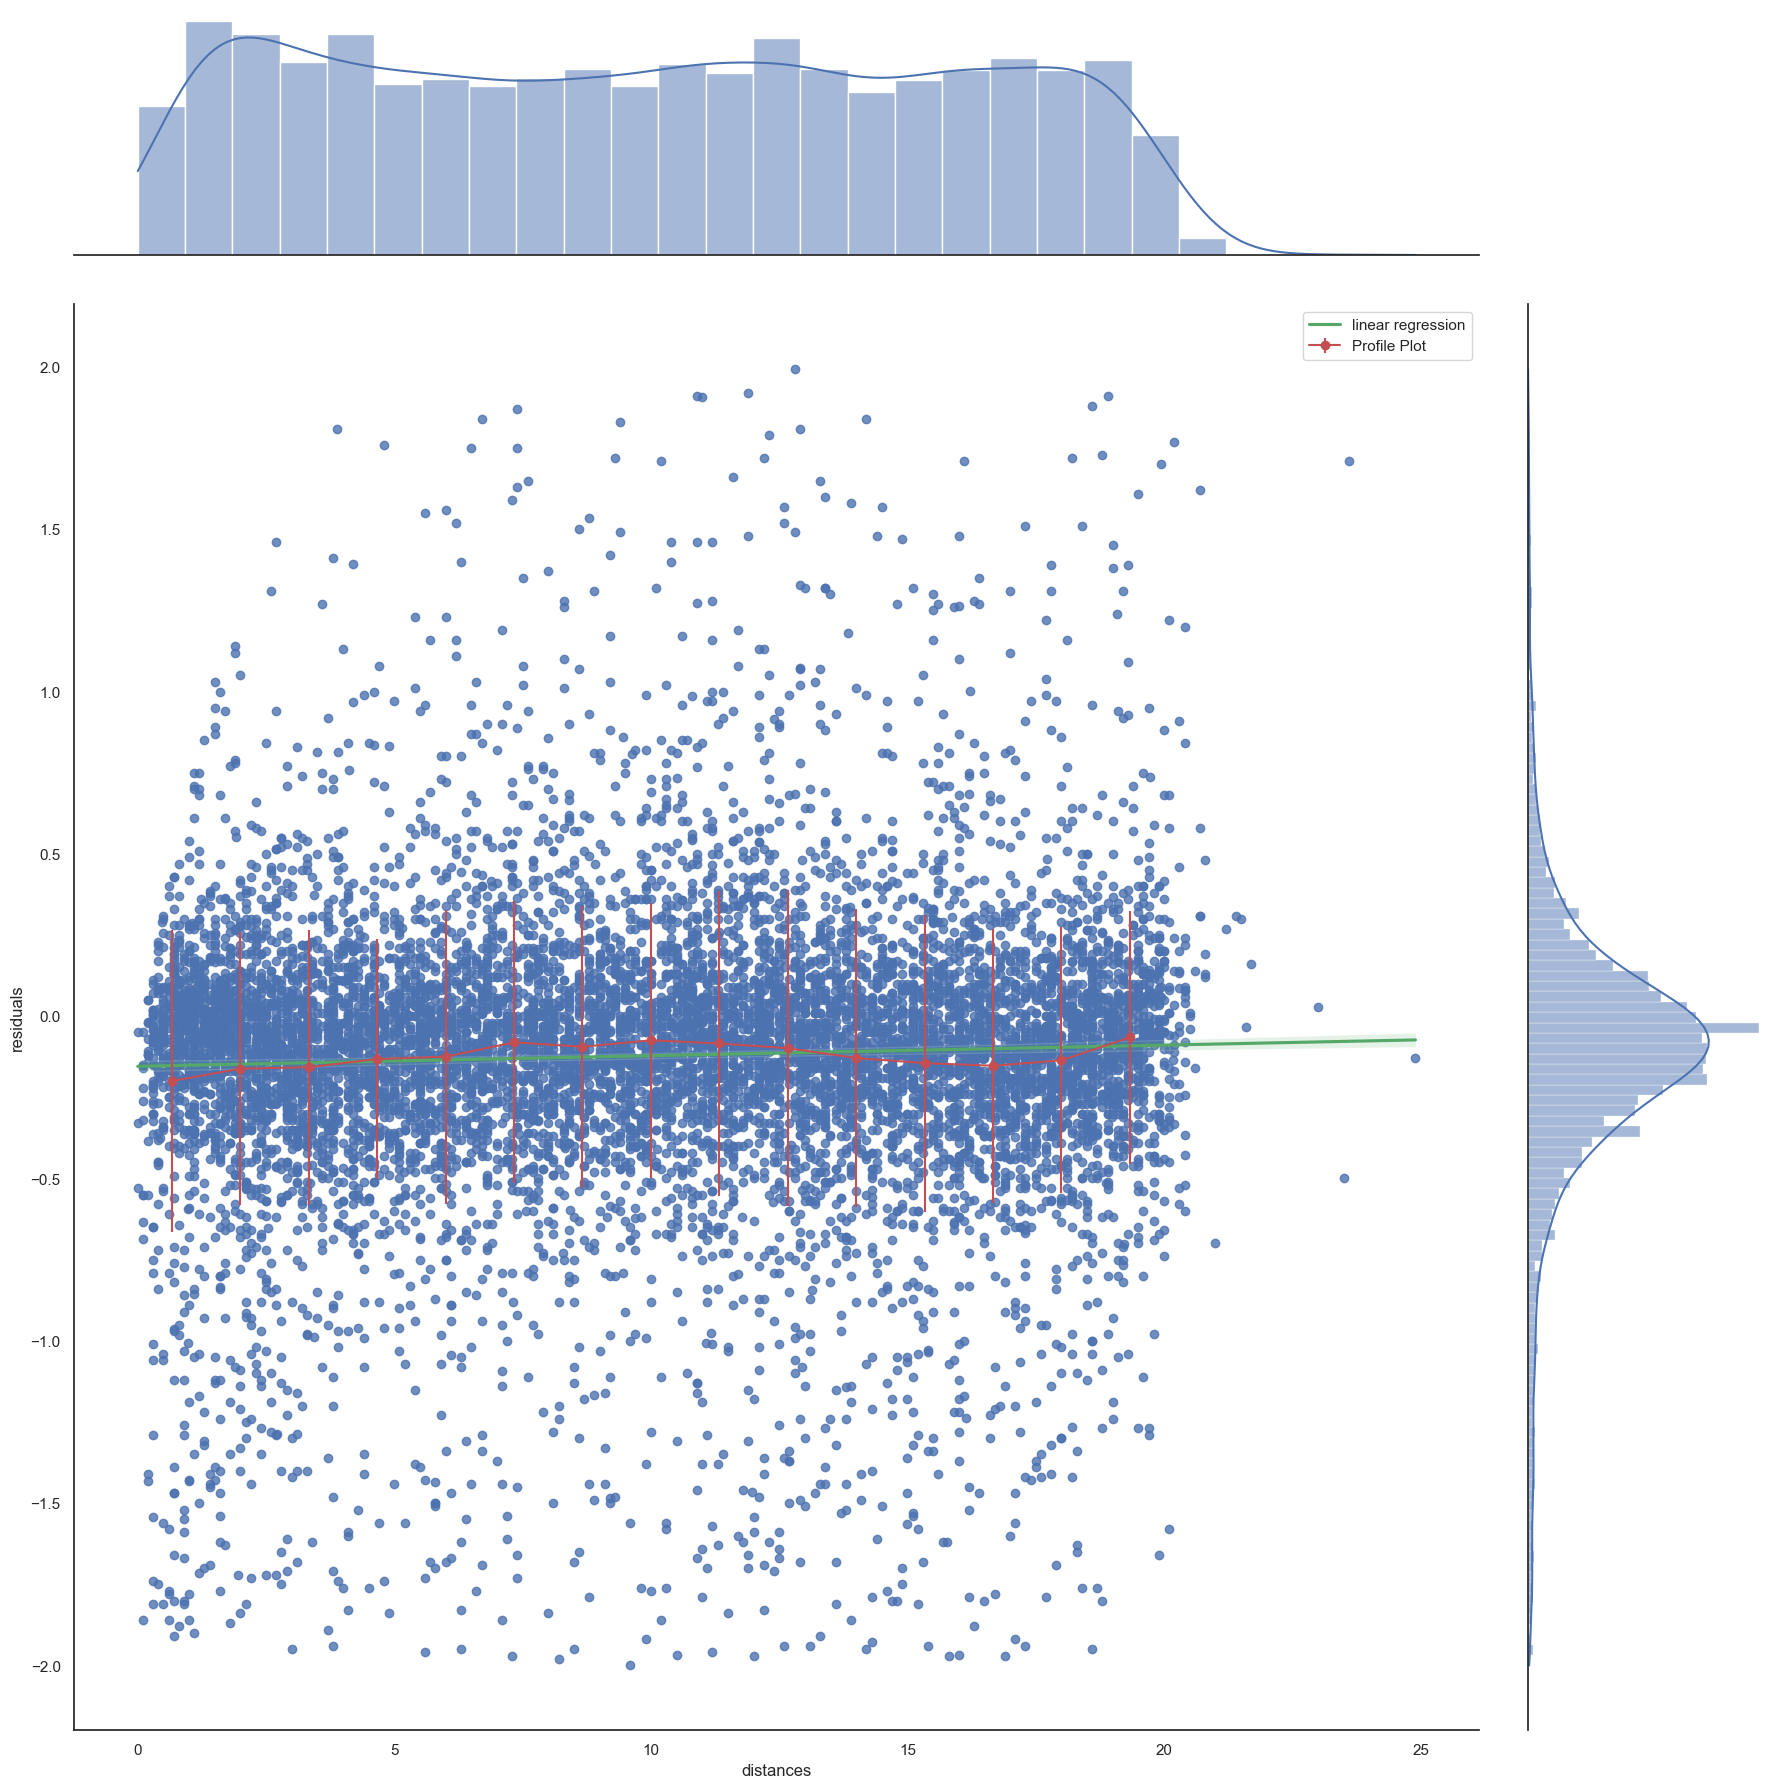

In [110]:
sns.set(style='white',color_codes=True) 
g = sns.jointplot(x = df['distances'], y = df['residuals'], 
            joint_kws={'line_kws':{'color':'g', 'label':'linear regression'}}, 
            marginal_kws={'color':'b'}, kind='reg')
g.fig.set_size_inches(20,20)
plt.sca(g.ax_joint)

nbin=15
his , b= np.histogram(df['distances'],nbin,range=(0,20))

x=  0.5*(b[1:] + b[:-1])

y=np.array([df.loc[(df['distances'] >=b[i]) & (df['distances'] <=b[i+1])]['residuals'].mean() for i in range(nbin)])
err_y=np.array([df.loc[(df['distances'] >b[i]) & (df['distances'] <b[i+1])]['residuals'].std() for i in range(nbin)])

plt.errorbar(x,y,yerr=err_y, label='Profile Plot',linewidth=1.5,color='r',marker='o')
g.ax_joint.legend()

#### Comment on the corrolation of the variables
* We can see that the two features residuals and distances are not correlated.
* joint plots, none of those features move in tandem nor they have a linear relationship with each other.
* the relationship in the form of an equation and The green regression line in the below figure is almost Horizontal which mean the Slope of the line is very close to Zero, which is a strong indicator that both of these features are not correlated.

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


<Figure size 2000x2000 with 0 Axes>

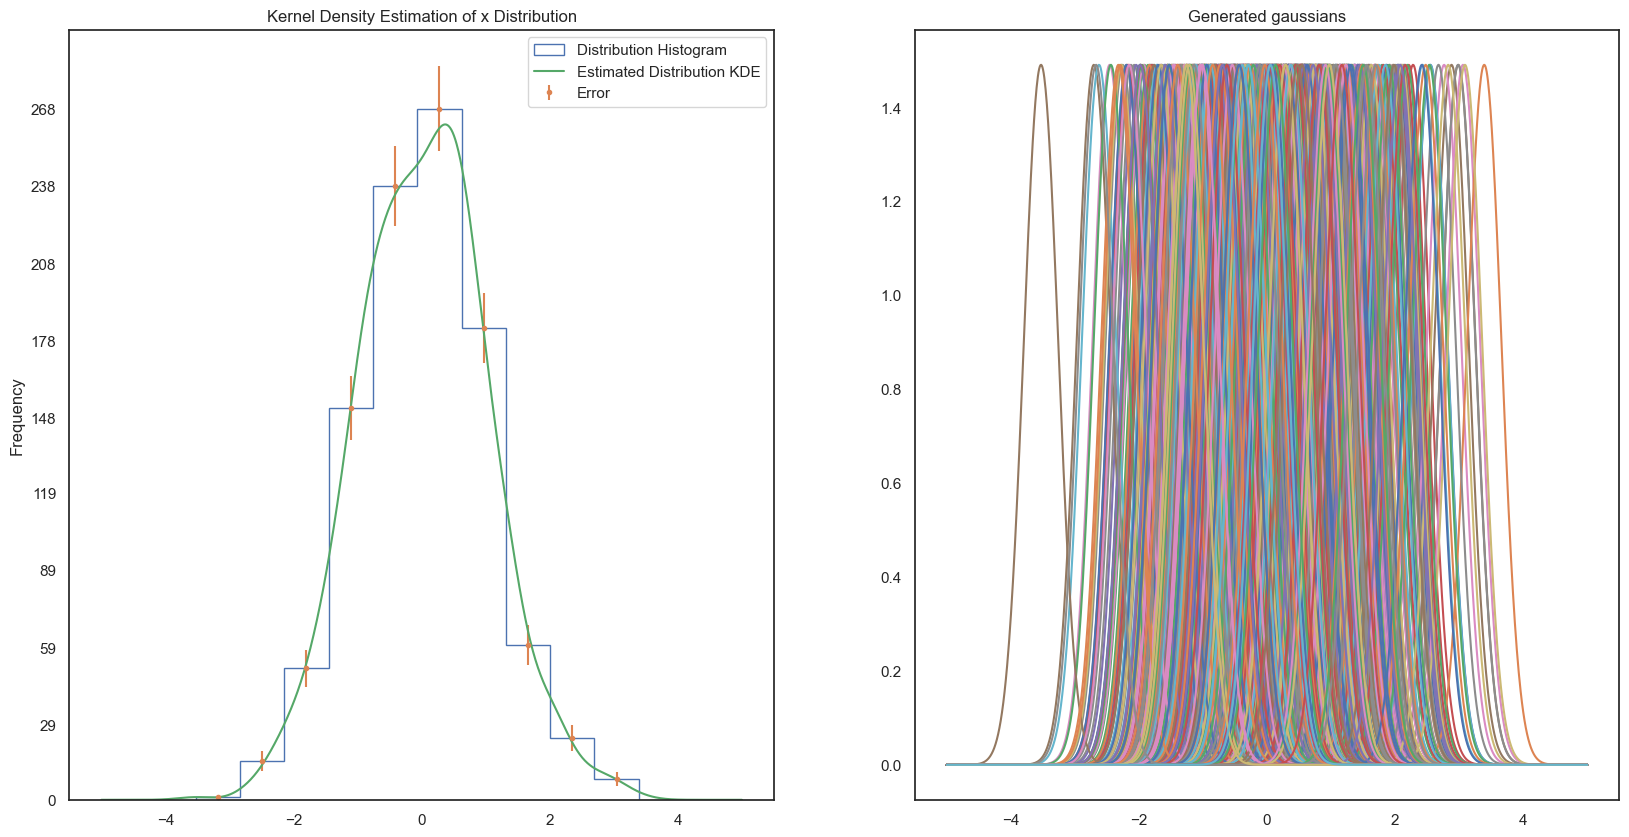

In [113]:
from scipy import stats
import scipy as sp

N = 1000
mean = 0
std = 1
x= np.random.normal(loc=mean, scale=std, size=N)

plt.figure(figsize = (20, 20))
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
y, var, bins = ax1.hist(x,bins=10,histtype='step',label='Distribution Histogram ')
cent = 0.5*(var[1:] + var[:-1])

ax1.errorbar(cent, y, yerr = y**0.5, marker = '.', drawstyle = 'steps-mid', ls='none', label = 'Error')
ax1.set_title('Kernel Density Estimation of x Distribution')
ax1.set_ylabel('Frequency')
ax1.set_yticks(ticks=np.linspace(0,y.max(),10,dtype=int))

std_default = 1.06 * x.std() * x.size**(-1/5)
gauss = []
for i in x:
    ls = np.linspace(-5, +5, num=N)
    rv = stats.norm(i, std_default)
    gauss.append(rv.pdf(ls))
    # In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
    ax2.plot(ls, gauss[-1])
ax2.set_title('Generated gaussians')

summed = np.sum(gauss, axis=0)/N*(sp.integrate.trapz(y,x=var[1:]))
ax1.plot(ls, summed,label='Estimated Distribution KDE')
ax1.legend(markerscale=1)